# Generic processing

## Concatenation

In [1]:
import matplotlib.pyplot as plt
import mikeio

Take a look at these two files with overlapping timesteps.

In [2]:
t1 = mikeio.read("../testdata/tide1.dfs1")
t1

<mikeio.DataSet>
Dimensions: (97, 10)
Time: 2019-01-01 00:00:00 - 2019-01-03 00:00:00
Items:
  0:  Level <Water Level> (meter)

In [3]:
t2 = mikeio.read("../testdata/tide2.dfs1")
t2

<mikeio.DataSet>
Dimensions: (97, 10)
Time: 2019-01-02 00:00:00 - 2019-01-04 00:00:00
Items:
  0:  Level <Water Level> (meter)

Plot one of the points along the line.

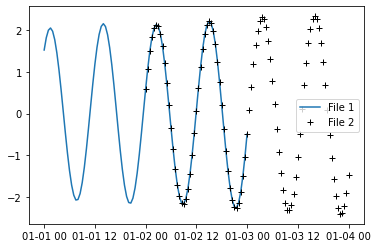

In [4]:
plt.plot(t1.time,t1.data[0][:,1], label="File 1")
plt.plot(t2.time,t2.data[0][:,1],'k+', label="File 2")
plt.legend()

In [5]:
import mikeio.generic

mikeio.generic.concat(infilenames=["../testdata/tide1.dfs1",
                                   "../testdata/tide2.dfs1"],
                     outfilename="concat.dfs1")

<mikeio.DataSet>
Dimensions: (145, 10)
Time: 2019-01-01 00:00:00 - 2019-01-04 00:00:00
Items:
  0:  Level <Water Level> (meter)

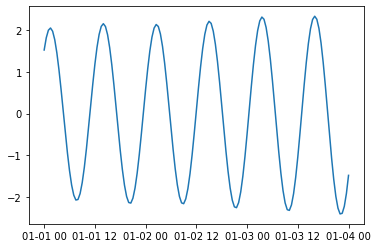

In [6]:
c = mikeio.read("concat.dfs1")
plt.plot(c.time,c.data[0][:,1])
c

## Scaling

Adding a constant e.g to adjust datum

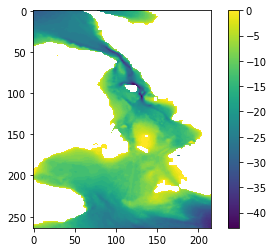

In [7]:
ds = mikeio.read("../testdata/gebco_sound.dfs2")
plt.imshow(ds['Elevation'][0])
plt.colorbar()

In [8]:
ds['Elevation'][0,104,131]

-43.0

This is the processing step.

In [9]:
mikeio.generic.scale("../tests/testdata/gebco_sound.dfs2","gebco_sound_local_datum.dfs2",offset=-2.1)

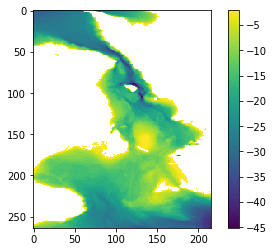

In [10]:
ds2 = mikeio.read("gebco_sound_local_datum.dfs2")
plt.imshow(ds2['Elevation'][0])
plt.colorbar()

In [11]:
ds2['Elevation'][0,104,131]

-45.099998474121094

### Spatially varying correction

In [12]:
import numpy as np
factor = np.ones_like(ds['Elevation'][0])
factor.shape

(264, 216)

Add some spatially varying factors, exaggerated values for educational purpose.

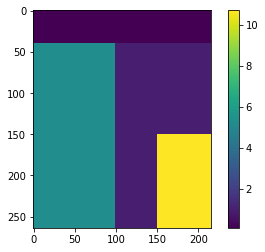

In [13]:
factor[:,0:100] = 5.3
factor[0:40,] = 0.1
factor[150:,150:] = 10.7
plt.imshow(factor)
plt.colorbar()

The 2d array must first be flipped upside down and then converted to a 1d vector using [numpy.ndarray.flatten](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html) to match how data is stored in dfs files.

In [14]:
factor_ud = np.flipud(factor)
factor_vec  = factor_ud.flatten()
mikeio.generic.scale("../tests/testdata/gebco_sound.dfs2","gebco_sound_spatial.dfs2",factor=factor_vec)

Text(0.5, 1.0, 'Spatial correction applied to dfs2')

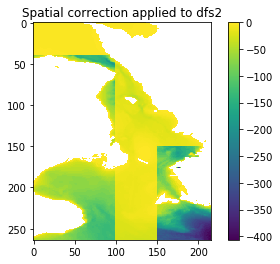

In [15]:
ds3 = mikeio.read("gebco_sound_spatial.dfs2")
plt.imshow(ds3['Elevation'][0])
plt.colorbar()
plt.title("Spatial correction applied to dfs2")

## Clean up

In [16]:
import os
os.remove("concat.dfs1")
os.remove("gebco_sound_local_datum.dfs2")
os.remove("gebco_sound_spatial.dfs2")